<center><h1>Data Explotation </center>

In [3]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Set the warning mode to 'none' to suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [4]:
# Setting up the working directory
os.chdir('..')

In [5]:
df = pd.read_csv(r'data/iot_23.csv', low_memory=False)

In [6]:
df.head(5)

ts                 uid        id.orig_h  id.orig_p  \
0  1.536227e+09  CeqqKl3hyLQmO8LK98  192.168.100.111    17576.0   
1  1.536227e+09   C2oHQWo1EFGH8D9x7  192.168.100.111    17576.0   
2  1.536227e+09  CJLVjs4BByG04mczXc  192.168.100.111    17576.0   
3  1.536227e+09   C0z4uS9AWHDH2s4S7  192.168.100.111    17576.0   
4  1.536227e+09  CxbNVk3liFNUIlqSPi  192.168.100.111    17576.0   

        id.resp_h  id.resp_p proto service duration orig_bytes  ...  \
0    78.1.220.212     8081.0   tcp       -    3e-06          0  ...   
1    152.84.7.111     8081.0   tcp       -    2e-06          0  ...   
2    173.36.41.67     8081.0   tcp       -    2e-06          0  ...   
3    87.13.21.104     8081.0   tcp       -    2e-06          0  ...   
4  99.110.163.140     8081.0   tcp       -    2e-06          0  ...   

  conn_state local_orig local_resp missed_bytes  history orig_pkts  \
0         S0          -          -          0.0        S       2.0   
1         S0          -          -          0.0        S       2.0   
2         S0          -          -          0.0        S       2.0   
3         S0          -          -          0.0        S       2.0   
4         S0          -          -          0.0        S       2.0   

   orig_ip_bytes  resp_pkts  resp_ip_bytes                      label  
0           80.0        0.0            0.0  PartOfAHorizontalPortScan  
1           80.0        0.0            0.0  PartOfAHorizontalPortScan  
2           80.0        0.0            0.0  PartOfAHorizontalPortScan  
3           80.0        0.0            0.0  PartOfAHorizontalPortScan  
4           80.0        0.0            0.0  PartOfAHorizontalPortScan  

[5 rows x 21 columns]

In [7]:
# Checking the count of the columns
print(df.columns)
print('\n')
print('Total number of columns', len(df.columns))

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')


Total number of columns 21


In [8]:
# Checking the data types of the dataframe
df.dtypes

ts               float64
uid               object
id.orig_h         object
id.orig_p        float64
id.resp_h         object
id.resp_p        float64
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig        object
local_resp        object
missed_bytes     float64
history           object
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
label             object
dtype: object

## Dataset Description
1. ts --	The time when the capture was done, expressed in Unix Time
2. uid --	The ID of the capture
3. id_orig_h --	The IP address where the attack happened, either IPv4 or IPv6
4. id_orig_p --	The port used by the responder
5. id_resp_h --	The IP address of the device on which the capture happened
6. id_resp_p --	The port used for the response from the device where the capture happened
7. proto --	The network protocol used for the data package
8. service --	The application protocol
9. duration --	The amount of time data was traded between the device and the attacker
10. orig_bytes --	The amount of data sent to the device
11. resp_bytes --	The amount of data sent by the device
12. conn_state --	The state of the connection
13. local_orig --	Whether the connection originated locally
14. local_resp --	Whether the response originated locally
15. missed_bytes --	Number of missed bytes in a message
16. history --	The history of the state of the connection	
17. orig_pkts --	Number of packets being sent to the device	
18. orig_ip_bytes --	Number of bytes being sent to the device
19. resp_pkts --	Number of packets being sent from the device
20. resp_ip_bytes --	Number of bytes being sent from the device
21. label --	The type of capture, benign or malicious


In [9]:
# Check for different types of attacks and their frequencies in the data
df['label'].value_counts()

PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

<center><h1>Data Cleansing </center>

In [19]:
# Check if any null data exists in the dataset
df.isna().sum()

ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [11]:
# Convert Unix timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'], unit='s')

In [12]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

## Outlier Treatment
1. Z-Score Calculation: For every data point, compute its Z-score, which represents how many standard deviations the data point is away from the mean of the dataset.

2. Threshold Determination: Set a threshold (commonly set to a value like 3) to determine how extreme a Z-score has to be for the corresponding data point to be considered an outlier.

3. Outlier Identification: Data points with Z-scores greater than the threshold are identified as outliers. Essentially, points that are too far from the mean, based on the set threshold, are flagged.

4. Outlier Removal: Using the identified outliers from the previous step, these data points are excluded or replaced to cleanse the dataset.

5. Clean Dataset: After removal, the result is a dataset with reduced extremities and variations caused by outliers.

In [13]:
# Define a threshold for considering values as outliers
threshold = 3

# Copy the original DataFrame to a new one to retain all columns
df_no_outliers = df.copy(deep = True)

# Iterate through each numerical column
for column in df.select_dtypes(include=np.number):
    # Calculate the z-scores for the column
    z_scores = np.abs(stats.zscore(df_no_outliers[column]))
    
    # Identify outliers
    outliers = np.where(z_scores > threshold)
    
    # Create a mask to filter out outliers
    mask = ~(z_scores > threshold)
    
    # Replace outlier values with NaN
    df_no_outliers[column][~mask] = np.nan

# Optionally, you can drop rows with any missing values after outlier treatment
df_no_outliers.dropna(inplace=True)

In [14]:
df_no_outliers

ts                 uid  \
0       2018-09-06 09:43:43.384673024  CeqqKl3hyLQmO8LK98   
1       2018-09-06 09:43:43.384677888   C2oHQWo1EFGH8D9x7   
2       2018-09-06 09:43:43.384681984  CJLVjs4BByG04mczXc   
3       2018-09-06 09:43:43.384694016   C0z4uS9AWHDH2s4S7   
4       2018-09-06 09:43:43.384698112  CxbNVk3liFNUIlqSPi   
...                               ...                 ...   
6046618 2019-07-03 14:39:12.145404928  CbiAr234EfpzQInxbg   
6046619 2019-07-03 14:39:12.076456192  CqEhZf1lYmVokqECn3   
6046620 2019-07-03 14:39:12.588412928  Cr5vKO1CGfMQwFp22c   
6046621 2019-07-03 14:39:13.612461056  CQ5cJ21U9NUbUWIznd   
6046622 2019-07-03 14:39:13.917406976  CjD5ve2qwxfFtvd4zl   

                        id.orig_h  id.orig_p         id.resp_h  id.resp_p  \
0                 192.168.100.111    17576.0      78.1.220.212     8081.0   
1                 192.168.100.111    17576.0      152.84.7.111     8081.0   
2                 192.168.100.111    17576.0      173.36.41.67     8081.0   
3                 192.168.100.111    17576.0      87.13.21.104     8081.0   
4                 192.168.100.111    17576.0    99.110.163.140     8081.0   
...                           ...        ...               ...        ...   
6046618                   0.0.0.0       68.0   255.255.255.255       67.0   
6046619                        ::      143.0          ff02::16        0.0   
6046620                        ::      135.0  ff02::1:ffd5:cdf      136.0   
6046621  fe80::5bcc:698e:39d5:cdf      143.0          ff02::16        0.0   
6046622  fe80::5bcc:698e:39d5:cdf      133.0           ff02::2      134.0   

        proto service            duration orig_bytes  ... conn_state  \
0         tcp       -               3e-06          0  ...         S0   
1         tcp       -               2e-06          0  ...         S0   
2         tcp       -               2e-06          0  ...         S0   
3         tcp       -               2e-06          0  ...         S0   
4         tcp       -               2e-06          0  ...         S0   
...       ...     ...                 ...        ...  ...        ...   
6046618   udp    dhcp           90.034713     3300.0  ...         S0   
6046619  icmp       -            90.39997      340.0  ...        OTH   
6046620  icmp       -   89.82403000000001       72.0  ...        OTH   
6046621  icmp       -           45.215915      200.0  ...        OTH   
6046622  icmp       -  44.242222999999996        0.0  ...        OTH   

        local_orig local_resp missed_bytes  history orig_pkts  orig_ip_bytes  \
0                -          -          0.0        S       2.0           80.0   
1                -          -          0.0        S       2.0           80.0   
2                -          -          0.0        S       2.0           80.0   
3                -          -          0.0        S       2.0           80.0   
4                -          -          0.0        S       2.0           80.0   
...            ...        ...          ...      ...       ...            ...   
6046618          -          -          0.0        D      11.0         3608.0   
6046619          -          -          0.0        -       9.0          844.0   
6046620          -          -          0.0        -       3.0          216.0   
6046621          -          -          0.0        -       8.0          648.0   
6046622          -          -          0.0        -       2.0           96.0   

         resp_pkts  resp_ip_bytes                      label  
0              0.0            0.0  PartOfAHorizontalPortScan  
1              0.0            0.0  PartOfAHorizontalPortScan  
2              0.0            0.0  PartOfAHorizontalPortScan  
3              0.0            0.0  PartOfAHorizontalPortScan  
4              0.0            0.0  PartOfAHorizontalPortScan  
...            ...            ...                        ...  
6046618        0.0            0.0                     Benign  
6046619        0.0            0.0              

In [20]:
# Creating a deep copy of the dataframe
df = df_no_outliers.copy(deep = True)

In [22]:
# Saving the cleaned dataframe
df.to_csv('data/iot_23_cleaned.csv',index = False)

<center><h1>Exploratory Data Analysis </center>

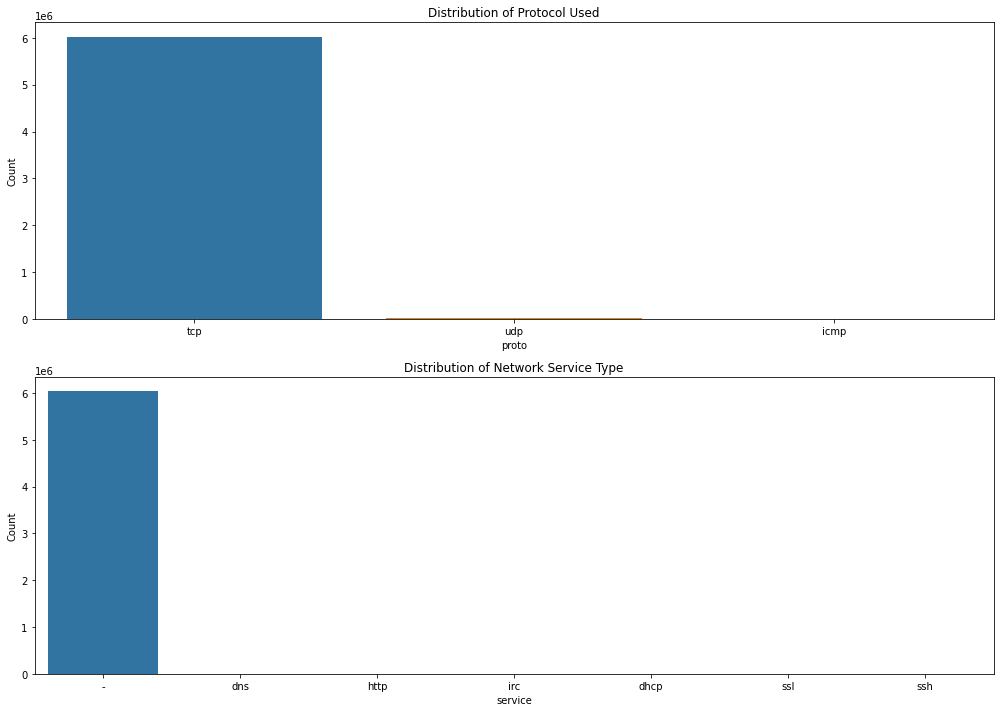

In [30]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Distribution of proto (Protocol used)
sns.countplot(data=df, x='proto', ax=ax[0])
ax[0].set_title('Distribution of Protocol Used')
ax[0].set_ylabel('Count')

# Distribution of service (Network service type)
sns.countplot(data=df, x='service', ax=ax[1])
ax[1].set_title('Distribution of Network Service Type')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<b>Insights:
1. **Distribution of Protocol Used**: The majority of the connections in the sample use the tcp protocol, followed by udp. There are very few connections that utilize other protocols.
2. **Distribution of Network Service Type**: Most connections do not have a specified service type (-). Among those that are specified, http is the most prevalent.

In [33]:
# Filter out non-numeric values (like '-')
iot_23_filtered = df[df['duration'] != '-']
iot_23_filtered['duration'] = iot_23_filtered['duration'].astype(float)

# Distribution of connection duration
fig_duration = px.histogram(iot_23_filtered, x="duration", nbins=100, title="Distribution of Connection Duration")

# Filter out non-numeric values for orig_bytes
iot_23_filtered_bytes = df[df['orig_bytes'] != '-']
iot_23_filtered_bytes['orig_bytes'] = iot_23_filtered_bytes['orig_bytes'].astype(float).astype(int)


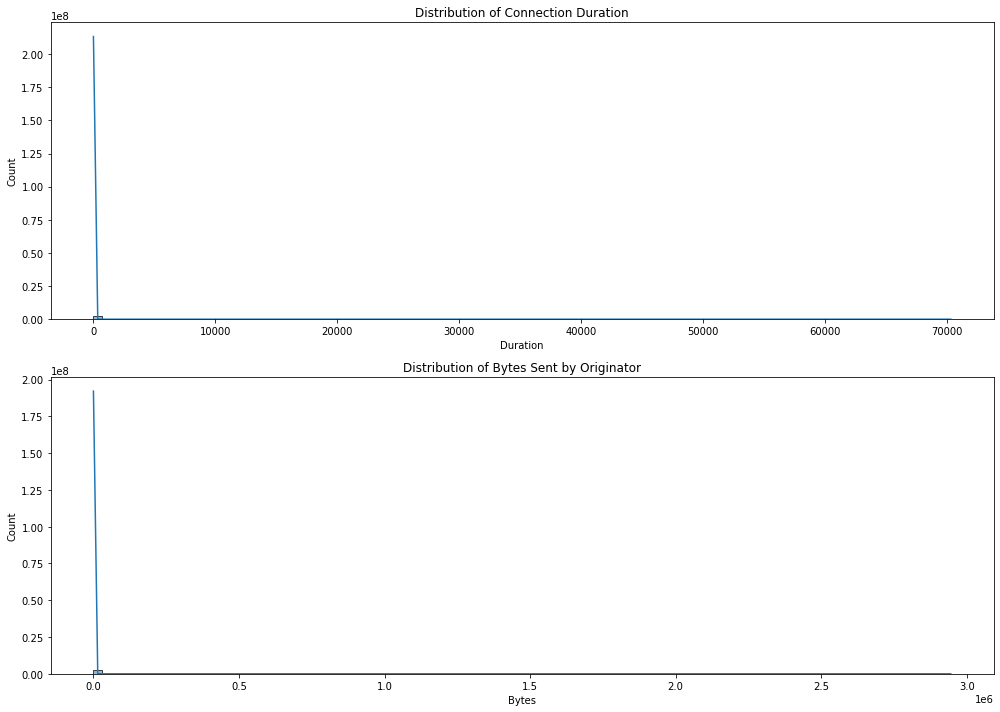

In [35]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Distribution of connection duration
sns.histplot(iot_23_filtered['duration'], bins=100, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Connection Duration')
ax[0].set_xlabel('Duration')
ax[0].set_ylabel('Count')

# Distribution of orig_bytes
sns.histplot(iot_23_filtered_bytes['orig_bytes'], bins=100, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Bytes Sent by Originator')
ax[1].set_xlabel('Bytes')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<b>Insights:</b>
1. **Distribution of Connection Duration**: Most of the connections have a short duration, with a peak near the start. This could indicate a lot of short-lived connections, possibly signifying network scans or brief exchanges.
2. **Distribution of Bytes Sent by Originator**: The vast majority of connections involve the transmission of a small number of bytes. However, there are a few connections with significantly larger byte transmissions, potentially indicating data exfiltration or large file transfers.

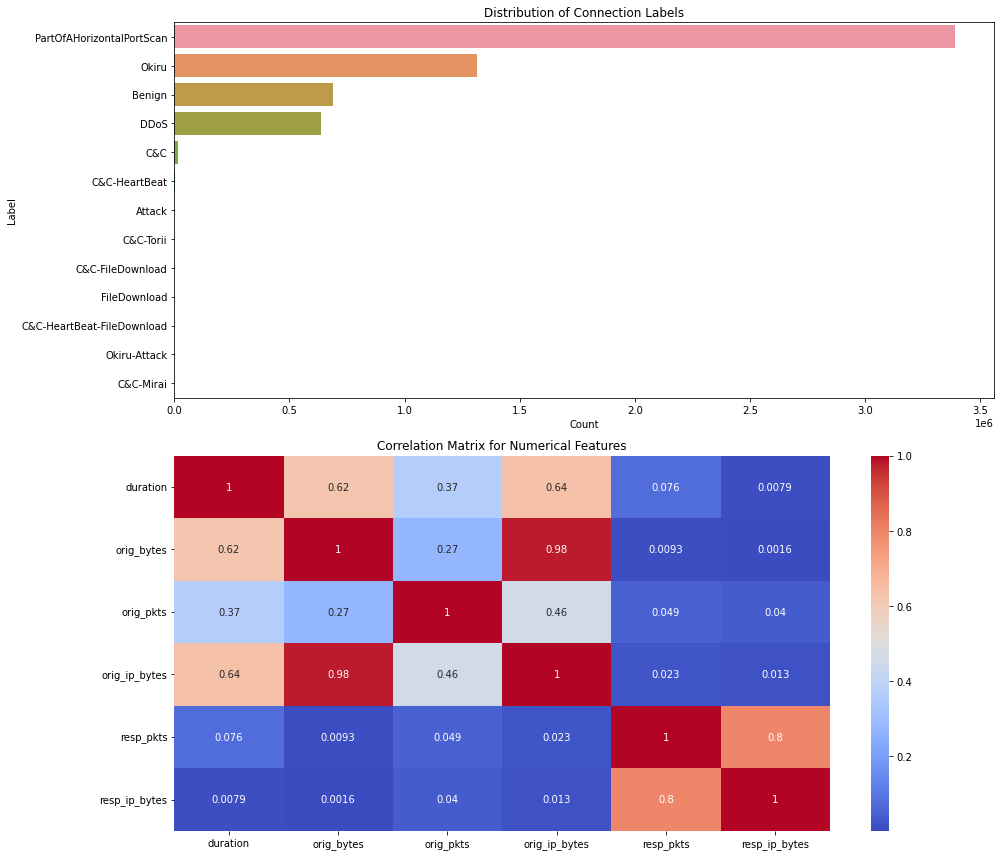

In [36]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Distribution of label
sns.countplot(data=df, y='label', ax=ax[0], order=df['label'].value_counts().index)
ax[0].set_title('Distribution of Connection Labels')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Label')

# Correlation matrix for numerical features
# Filter out non-numeric values for duration and orig_bytes
correlation_data = iot_23_filtered_bytes[['duration', 'orig_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']]
correlation_data['duration'] = correlation_data['duration'].astype(float)
correlation_data['orig_bytes'] = correlation_data['orig_bytes'].astype(int)
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix for Numerical Features')

plt.tight_layout()
plt.show()


<b>Insights:</b>
1. **Distribution of Connection Labels**: The data predominantly contains benign connections, but there are several labeled as PartOfAHorizontalPortScan, suggesting instances of scanning activity. There are also a few other labels present in smaller quantities.


2. **Correlation Matrix for Numerical Features**:
    There's a high correlation between orig_pkts (original packets) and orig_ip_bytes (original IP bytes). This makes sense as more packets usually mean more bytes.

    resp_pkts (response packets) and resp_ip_bytes (response IP bytes) also exhibit a high correlation for similar reasons.
    There's a mild correlation between orig_bytes and orig_pkts, indicating that as the byte count increases, the number of packets usually increases.

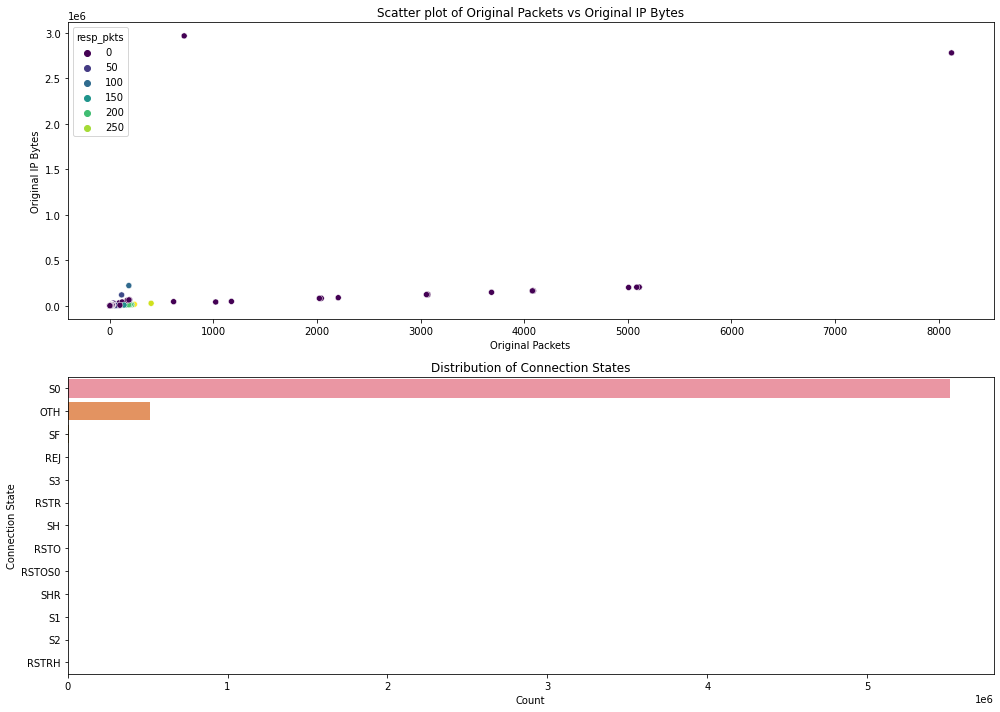

In [38]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Scatter plot of orig_pkts vs orig_ip_bytes
sns.scatterplot(data=correlation_data, x='orig_pkts', y='orig_ip_bytes', hue='resp_pkts', palette='viridis', ax=ax[0])
ax[0].set_title('Scatter plot of Original Packets vs Original IP Bytes')
ax[0].set_xlabel('Original Packets')
ax[0].set_ylabel('Original IP Bytes')

# Distribution of conn_state
sns.countplot(data=df, y='conn_state', ax=ax[1], order=df['conn_state'].value_counts().index)
ax[1].set_title('Distribution of Connection States')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Connection State')

plt.tight_layout()
plt.show()

<b>Insights:</b>

1. **Scatter plot of Original Packets vs Original IP Bytes**: As expected from the correlation matrix, there's a clear trend that as the number of original packets increases, the original IP bytes also increase. The color intensity (representing resp_pkts) adds another dimension, showing that as both original packets and bytes increase, the response packets generally increase.

2. **Distribution of Connection States**: The most frequent connection state is S0, followed by OTH. The S0 state indicates connection attempts where the server never replied to the initial SYN packet from the client. This could be indicative of potential scanning activity.

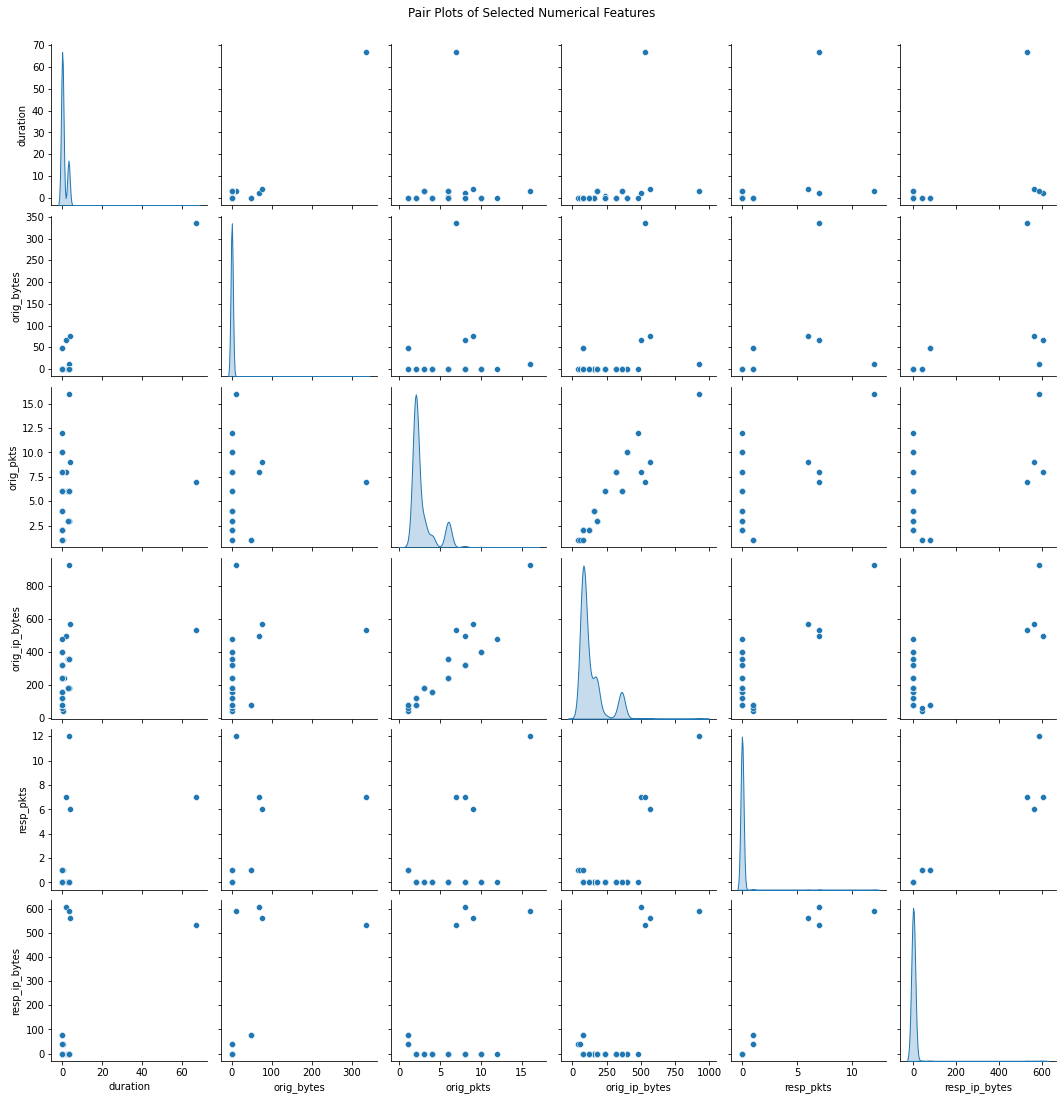

In [39]:
# Sample a subset of the data for visualization
sample_data = correlation_data.sample(n=min(1000, len(correlation_data)), random_state=42)

# Pair plot for selected numerical features
pairplot = sns.pairplot(sample_data, diag_kind='kde')
pairplot.fig.suptitle('Pair Plots of Selected Numerical Features', y=1.02)
plt.show()

<b>Insights<b>:
1. **Pair Plots of Selected Numerical Features**:
    The diagonal KDE plots confirm our earlier observations regarding the distribution of features.
    
    Scatter plots between orig_pkts vs orig_ip_bytes, and resp_pkts vs resp_ip_bytes show a linear relationship, affirming the correlation we identified earlier.
    
    The other scatter plots provide an opportunity to identify potential patterns or clusters. For instance, there seems to be a cluster at the lower end of orig_bytes vs orig_ip_bytes, indicating a set of connections with small byte counts but varying IP bytes.

In [ ]:
# Next steps would be data sampling, feature selection/engineering and modelling